<a href="https://colab.research.google.com/github/kauaneleal/Projeto_Governanca_TI/blob/main/Suicidios_Brasil_2010_%C3%A0_2019_Uni9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Projeto de de Governança de TI: 
### Suicídios no Brasil do Ano de 2010 à 2019.

<img src="img/setembro-amarelo.png" width="80%" height="80%">

O suicído em um problema que tem afetado muitas pessoas ao longo dos anos. É algo extremamente complexo e delicado pode afetar indivíduos de todas as idades, gêneros, e culturas.
Embora seja um tema tabu em muitas sociedades, o suicídio é um problema de saúde pública importante em todo o mundo, portanto iremos levantar alguns dados a respeito deste tema.

### Obtenção dos dados.

Os dados foram obtidos no kaggle, site onde há um grande acervo de bases de dados, através do link: https://www.kaggle.com/datasets/psicodata/dados-de-suicidios-entre-2010-e-2019

### 1- Importação e leitura dos dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando bibliotecas:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

O Pandas é uma biblioteca para manipulação e análise de dados.

Matplotlib.pyplot é uma biblioteca para criação de visualizações de dados.

Plotly.express é uma biblioteca de criação de visualizações interativas de dados.

A biblioteca Seaborn serve para visualização de dados estatísticos.

NumPy é uma biblioteca voltada à computação numérica. Ela oferece suporte para operações matemáticas em matrizes e arrays multidimensionais, tornando-a uma escolha popular para a análise de dados científicos e numéricos.

Base de dados importada:

In [60]:
#Importando arquivo de texto.
dados = pd.read_csv('/content/drive/MyDrive/trabalho/suicidios_2010_a_2019.csv', index_col=None)

#Deixando as colunas em maiusculo para diferenciar dos dados.
dados.columns = dados.columns.str.upper()

dados.head()

<ipython-input-60-89e08c51bff6>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/drive/MyDrive/trabalho/suicidios_2010_a_2019.csv', index_col=None)


,UNNAMED: 0,ESTADO,ANO,MES,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


**Variáveis/Campos trabalhados:**

* *ID* -> Identificador da linha
* *ESTADO* -> O estado do ocorrido
* *ANO* -> Ano do ocorrido
* *MES* -> Mês do ocorrido
* *DTOBITO* -> Data do óbito
* *DTNASC* -> Data de nascimento do individuo
* *SEXO* -> Sexo do individuo
* *RACACOR* -> Raça/cor do individuo
* *ASSISTMED* -> Assistência médica
* *ESCMAE* -> Escolaridade (em anos) da mãe do individuo
* *ESTCIV* -> Estado Civil do individuo
* *ESC* -> Escolaridade (em anos) do individuo
* *OCUP* -> Ocupação do individuo 
* *CIDADE* -> Cidade do ocorrido
* *CAUSABAS* -> Causa básica da morte
* *CAUSABAS_O* -> Causa básica da morte
* *LOCOCOR* -> Local de ocorrência da morte
* *CIRURGIA* -> Foi realizada cirurgia?
* *IDADE* -> Idade do individuo
* *FAIXAETARIA* -> Classificação da faixa etária do individuo

### 2- Ajuste dos dados

Verificando dados do arquivo com o .info()

In [61]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UNNAMED: 0  112491 non-null  int64 
 1   ESTADO      112491 non-null  object
 2   ANO         112491 non-null  int64 
 3   MES         112491 non-null  int64 
 4   DTOBITO     112491 non-null  object
 5   DTNASC      101633 non-null  object
 6   SEXO        112469 non-null  object
 7   RACACOR     109320 non-null  object
 8   ASSISTMED   70687 non-null   object
 9   ESCMAE      15 non-null      object
 10  ESTCIV      103791 non-null  object
 11  ESC         84327 non-null   object
 12  OCUP        60274 non-null   object
 13  CODMUNRES   112491 non-null  object
 14  CAUSABAS    112491 non-null  object
 15  CAUSABAS_O  112204 non-null  object
 16  LOCOCOR     112031 non-null  object
 17  CIRURGIA    8549 non-null    object
dtypes: int64(3), object(15)
memory usage: 15.4+ MB


Verificando o que há dentro de "UNNAMED: 0"

In [62]:
dados['UNNAMED: 0'].unique

<bound method Series.unique of 0              1
1              2
2              3
3              4
4              5
           ...  
112486    112487
112487    112488
112488    112489
112489    112490
112490    112491
Name: UNNAMED: 0, Length: 112491, dtype: int64>

Entendemos que se trata de uma coluna de ID, iremos alterar o nome da coluna.

Também ajustaremos o nome da coluna "CODMUNRES" para "CIDADE".

In [63]:
dados.rename(columns={'UNNAMED: 0': 'ID'}, inplace=True)
dados.rename(columns={'CODMUNRES': 'CIDADE'}, inplace=True)

Vericando a tabela com o nome ajustado.

In [64]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          112491 non-null  int64 
 1   ESTADO      112491 non-null  object
 2   ANO         112491 non-null  int64 
 3   MES         112491 non-null  int64 
 4   DTOBITO     112491 non-null  object
 5   DTNASC      101633 non-null  object
 6   SEXO        112469 non-null  object
 7   RACACOR     109320 non-null  object
 8   ASSISTMED   70687 non-null   object
 9   ESCMAE      15 non-null      object
 10  ESTCIV      103791 non-null  object
 11  ESC         84327 non-null   object
 12  OCUP        60274 non-null   object
 13  CIDADE      112491 non-null  object
 14  CAUSABAS    112491 non-null  object
 15  CAUSABAS_O  112204 non-null  object
 16  LOCOCOR     112031 non-null  object
 17  CIRURGIA    8549 non-null    object
dtypes: int64(3), object(15)
memory usage: 15.4+ MB


Obtendo dados gerais e consolidados da base com o .shape

In [65]:
dados.shape

(112491, 18)

Na base há 112491 linhas e 18 colunas.

#### Análisando os dados ausentes da base

In [66]:
dados.isnull().sum()

ID                 0
ESTADO             0
ANO                0
MES                0
DTOBITO            0
DTNASC         10858
SEXO              22
RACACOR         3171
ASSISTMED      41804
ESCMAE        112476
ESTCIV          8700
ESC            28164
OCUP           52217
CIDADE             0
CAUSABAS           0
CAUSABAS_O       287
LOCOCOR          460
CIRURGIA      103942
dtype: int64

#### Trabalhando nos dados ausentes

Todos os dados com valores em branco serão preenchidos com "Sem informação", exceção exemplos abaixo:
* ASSISMED - Se está vazio, entendemos que não há uma assistencia médica, preenchemos com "Não".
* ESTCIV - Se está vazio, entendemos que está solteiro, preenchemos com "Solteiro".
* ESC - Se está vazio, entendemos que não possui estudo, preenchemos com "Nenhuma".
* OCUP - Se está vazio, entendemos que não trabalha, preenchemos com "DESEMPREGADO CRONICO".

Estes dados serão preenchidos usando o .fillna do pandas.

In [67]:
dados.update(dados['DTNASC'].fillna('Sem informação'))
dados.update(dados['SEXO'].fillna('Sem informação'))
dados.update(dados['RACACOR'].fillna('Sem informação'))
dados.update(dados['ASSISTMED'].fillna('Não'))
dados.update(dados['ESCMAE'].fillna('Sem informação'))
dados.update(dados['ESTCIV'].fillna('Solteiro'))
dados.update(dados['ESC'].fillna('Nenhuma'))
dados.update(dados['OCUP'].fillna('DESEMPREGADO CRONICO'))
dados.update(dados['CAUSABAS_O'].fillna('Sem informação'))
dados.update(dados['LOCOCOR'].fillna('Sem informação'))
dados.update(dados['CIRURGIA'].fillna('Sem informação'))

#### Criando a Coluna Idade

Como temos apenas a coluna de data de nascimento e não a idade diretamente, vamos criar uma coluna para fornecer a idade. A coluna dtnasc (data de nascimento) e dtobito (data de óbito) estão como object, será necessário, converte-las para o formato datetime:


In [68]:
#Convertendo valores em datetime, como temos dados inválidos para a conversão em DTNASC, a função errors="coerce" irá converter os valores para nulo.
dados['DTNASC'] = pd.to_datetime(dados['DTNASC'], format='%Y/%m/%d', errors="coerce") 
dados['DTOBITO'] = pd.to_datetime(dados['DTOBITO'], format='%Y/%m/%d', errors="coerce")

Fazendo o calculo

In [69]:
dados['IDADE'] = dados['DTOBITO'].dt.year - dados['DTNASC'].dt.year
dados['IDADE'] = dados.IDADE.mask(dados.IDADE < 0, dados.IDADE.median())

Na primeira linha fizemos o calculo, como há valores nulos na coluna DTNASC, algumas linhas na idade receberam dados negativos, substituimos esses dados pela mediana.

#### Criando a coluna de classificação de faixa etária

In [70]:
# definir os limites das faixas etárias
limites = [0, 12, 18, 45, 60, float('inf')]

# definir os rótulos das faixas etárias
rotulos = ['Criança', 'Jovem', 'Adulto', 'Meia Idade', 'Idoso']

# criar a coluna de faixas etárias
dados['FAIXAETARIA'] = pd.cut(dados['IDADE'], bins=limites, labels=rotulos, ordered=False)


#### Vizualização da base após ajustes de dados:

In [71]:
dados.head()

,ID,ESTADO,ANO,MES,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CIDADE,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA,IDADE,FAIXAETARIA
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Não,Sem informação,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não,11.0,Criança
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Não,Sem informação,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,25.0,Adulto
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Não,Sem informação,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,15.0,Jovem
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Não,Sem informação,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não,27.0,Adulto
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Não,Sem informação,Casado/a,Nenhuma,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não,28.0,Adulto


### 3- Explorando os dados

#### Cidades com maiores ocorrências

Iremos verificar a quantidade de suicidios por cidade

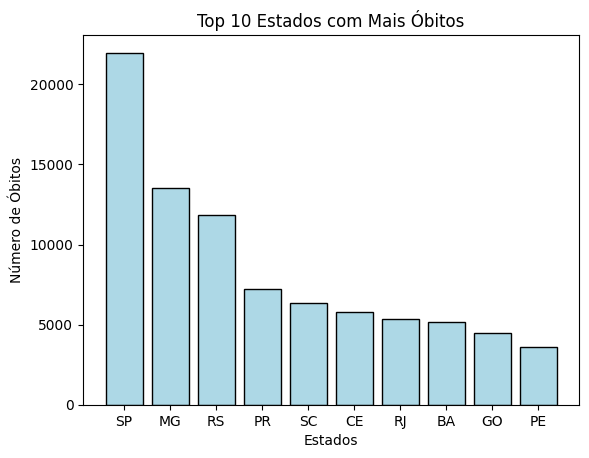

In [72]:
contagem_estados = dados['ESTADO'].value_counts()
top_10_estados = contagem_estados[:10]
plt.bar(top_10_estados.index, top_10_estados.values, color='lightblue',edgecolor='black')
plt.title('Top 10 Estados com Mais Óbitos')
plt.xlabel('Estados')
plt.ylabel('Número de Óbitos')
plt.show()

Nota-se que São Paulo é o estado que mais possui ocorrências, deve-se ao fato de ser o estado mais populoso do pais (gov.br).

Há de se destacar o estado do Rio Grande do Sul, proporcionalmente é o estado com mais casos.

#### Ocorrências ao longo dos anos

---


Apresentaremos uma grafico onde mostra o crescente número de casos ao longo dos anos.

Text(0, 0.5, 'Quantidade de obtos\n')

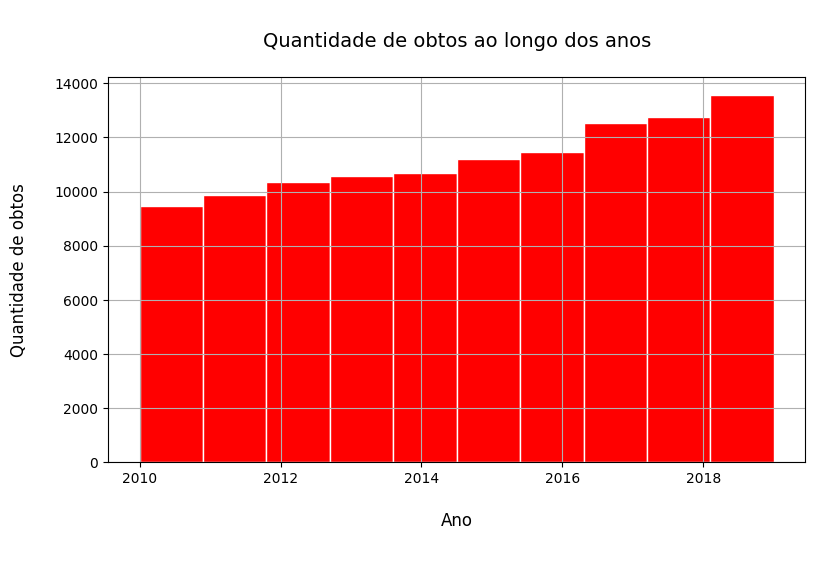

In [73]:
plt.figure(figsize=(9,5))
dados["ANO"].plot.hist(color='red', edgecolor='white', grid=True)
plt.title('\nQuantidade de obtos ao longo dos anos\n', fontsize=14)
plt.xlabel('\nAno\n', fontsize=12)
plt.ylabel('Quantidade de obtos\n', fontsize=12)

Os casos vem aumentando ao longo dos anos, há visivelmente um salto mais entre 2016 e 2017, assim como 2018 e 2019.

### Referências bibliográficas:

São Paulo, estado mais populoso, DISPONÍVEL EM População brasileira chega a 213,3 milhões de habitantes, estima IBGE (https://www.gov.br/pt-br/noticias/financas-impostos-e-gestao-publica/2021/08/populacao-brasileira-chega-a-213-3-milhoes-de-habitantes-estima-ibge) Publicado em 27/08/2021 18h37, Atualizado em 31/10/2022 15h06

In [74]:
# Filtrando suicídios de pessoas com mais de 60 anos
filtro = dados['IDADE'] > 60
suicidios_acima_60 = dados[filtro]

# Agrupando por estado e contando os suicídios
suicidios_por_estado = suicidios_acima_60['ESTADO'].value_counts()

#### Suicídios de pessoas acima de 60 anos de idade.

---


Apresentaremos uma gráfico onde mostra uma taxa de mortes por suicídio em cada estado do Brasil.

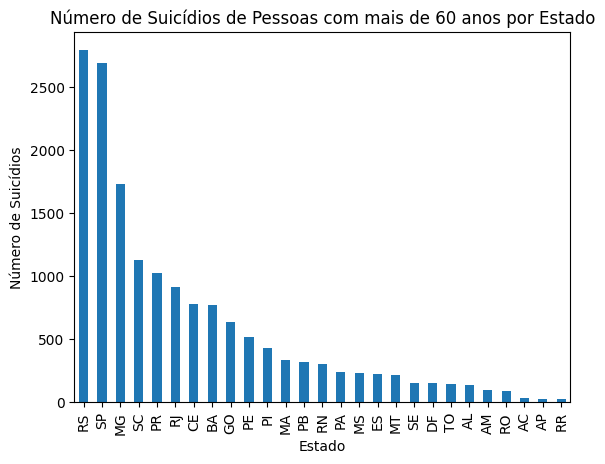

In [75]:
# Criando o gráfico de barras
suicidios_por_estado.plot(kind='bar')

# Configurando os rótulos do eixo x e y
plt.xlabel('Estado')
plt.ylabel('Número de Suicídios')

# Configurando o título do gráfico
plt.title('Número de Suicídios de Pessoas com mais de 60 anos por Estado')

# Exibindo o gráfico
plt.show()

Percebe-se que Rio Grande do Sul possui a maior taxa de suicídios com pessoas acima de 60 anos de idade. Existem vários fatores que contribuem para essa realidade sendo uma delas a principal causa é a depressão, e é importante analisá-los com seriedade. Primeiramente, a solidão e o isolamento social são desafios significativos para os idosos em uma sociedade cada vez mais acelerada e individualista. A falta de redes de apoio e interações sociais regulares pode levar à deterioração da saúde mental e ao aumento do risco de suicídio.

### Referências bibliográficas:

Taxa de suicídio entre idosos cresce e prevenção é o melhor caminho (https://saude.rs.gov.br/taxa-de-suicidio-entre-idosos-cresce-e-prevencao-e-o-melhor-caminho) Publicado em 30/09/2019 às 16h37min.

Por que o RS é o Estado com a maior taxa de suicídios? (https://www.ihu.unisinos.br/categorias/622284-por-que-o-rs-e-o-estado-com-a-maior-taxa-de-suicidios) Publicado em 19 Setembro 2022.


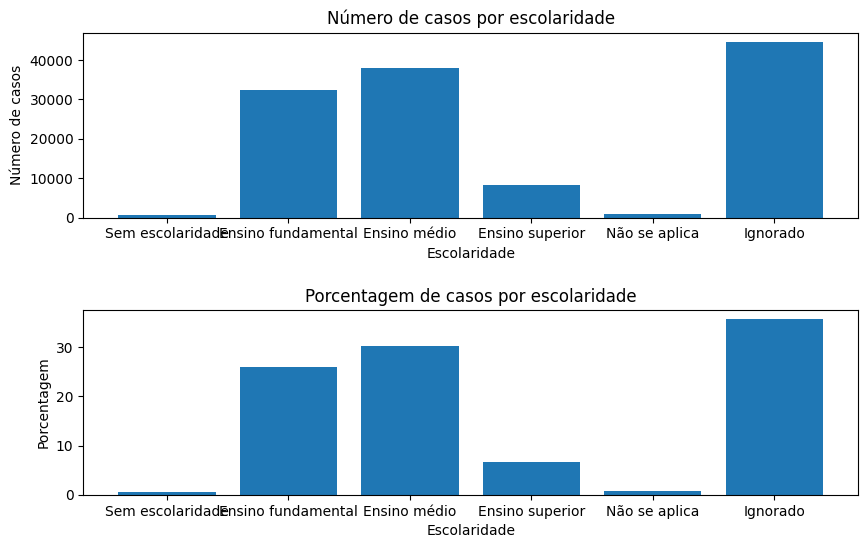

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fornecidos
escolaridade = ['Sem escolaridade', 'Ensino fundamental', 'Ensino médio', 'Ensino superior', 'Não se aplica', 'Ignorado']
numero_casos = [610, 32293, 37836, 8331, 969, 44670]
porcentagens = [0.5, 25.9, 30.3, 6.7, 0.8, 35.8]

# Criar um DataFrame com as informações
data = {'Escolaridade': escolaridade, 'Número de Casos': numero_casos, 'Porcentagem': porcentagens}
df = pd.DataFrame(data)

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras para o número de casos
plt.subplot(2, 1, 1)
plt.bar(df['Escolaridade'], df['Número de Casos'])
plt.title('Número de casos por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de casos')

# Criar o gráfico de barras para as porcentagens
plt.subplot(2, 1, 2)
plt.bar(df['Escolaridade'], df['Porcentagem'])
plt.title('Porcentagem de casos por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem')

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.5)

# Exibir o gráfico
plt.show()





Os gráficos mostram o número de casos de suicídio em cada faixa de escolaridade, permitindo-nos comparar visualmente a incidência de suicídios em diferentes níveis educacionais .É importante ter em mente que o suicídio é um assunto complexo e multifacetado, e a escolaridade é apenas um dos muitos fatores que podem estar relacionados a esse comportamento.

referêcias Bibliográficas:

https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/epidemiologicos/edicoes/2021/boletim_epidemiologico_svs_33_final.pdf"

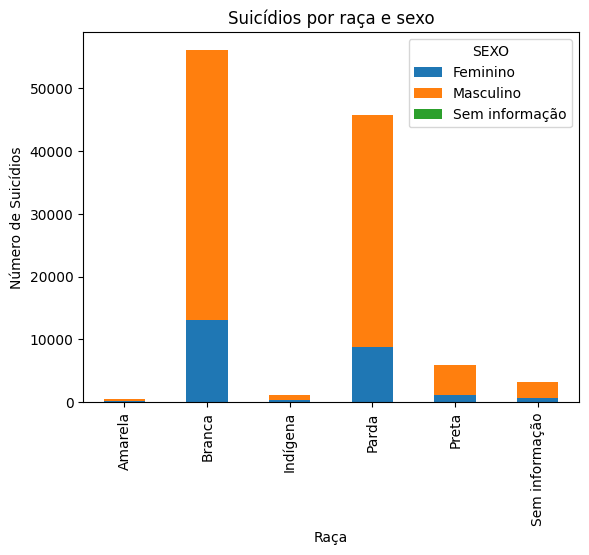

In [77]:
# Filtrar os dados por raça e sexo
dados_filtrados = dados.groupby(['RACACOR', 'SEXO']).size().unstack()

# Plotar o gráfico de barras
dados_filtrados.plot(kind='bar', stacked=True)

# Configurar o título e os rótulos dos eixos
plt.title('Suicídios por raça e sexo')
plt.xlabel('Raça')
plt.ylabel('Número de Suicídios')

# Exibir o gráfico
plt.show()

A taxa de suicidio de pessoas do gênero masculino brancas é a maior entre elas, sendo seguido do genero masculino na cor parda. Onde temos o segundo lugar entre as maiores taxas. Logo após notamos quase o mesmo número entre mulheres pardas e brancas. Em comparação com esses numeros altíssimos, os casos de pessoas pretas, indígenas e amarelas são relativamente baixa. Se concentrando o menor valor diante as taxas

Referência bibliográfica: "O suicídio tem cara e cor" https://www.ihu.unisinos.br/categorias/589950-o-suicidio-tem-cara-e-cor

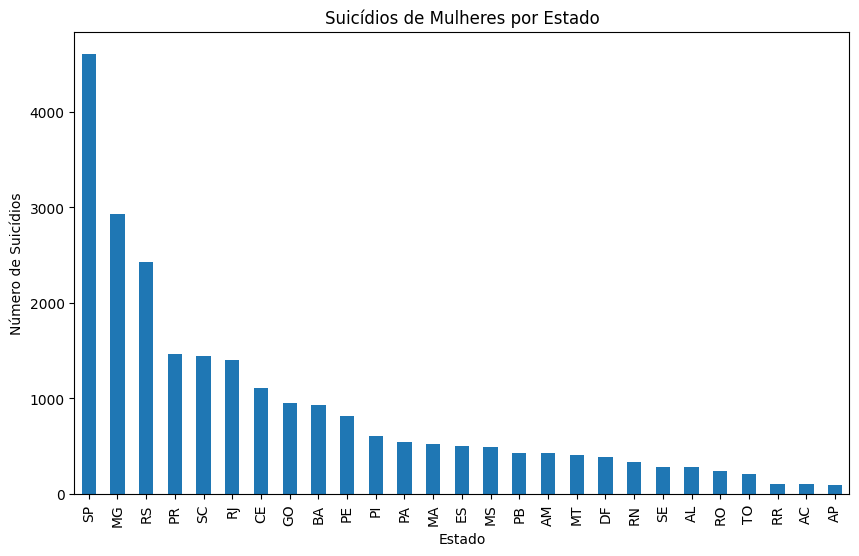

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar apenas os dados de suicídio de mulheres
dados_mulheres = dados[dados['SEXO'] == 'Feminino']

# Contar o número de suicídios por estado
suicidios_por_estado = dados_mulheres['ESTADO'].value_counts()

# Criar o gráfico de barras
suicidios_por_estado.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Estado')
plt.ylabel('Número de Suicídios')
plt.title('Suicídios de Mulheres por Estado')
plt.show()


Este gráfico mostra o número de suicídios de mulheres por estado no Brasil entre 2010 e 2019. Nota-se que São Paulo é o estado com mais suicidios, porém, a taxa de suicidios é maior no estado do Rio Grande do Sul.

Referências bibliográficas:
Suicídio entre mulheres cresce 50% em 10 anos: "Não sabia como ficar viva" (https://www.uol.com.br/universa/noticias/redacao/2020/09/06/suicidio-entre-mulheres-dispara-ideia-e-acabar-com-a-dor-nao-com-a-vida.htm) Publicado em: 06/09/2020 04h00

Suicídio de Mulheres(https://www.ipea.gov.br/atlasviolencia/dados-series/170)

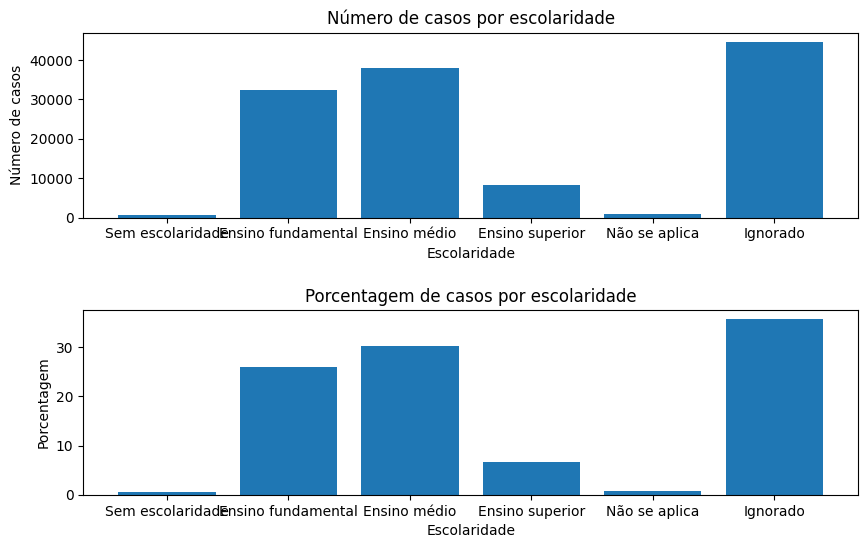

In [79]:
# Dados fornecidos
escolaridade = ['Sem escolaridade', 'Ensino fundamental', 'Ensino médio', 'Ensino superior', 'Não se aplica', 'Ignorado']
numero_casos = [610, 32293, 37836, 8331, 969, 44670]
porcentagens = [0.5, 25.9, 30.3, 6.7, 0.8, 35.8]

# Criar um DataFrame com as informações
data = {'Escolaridade': escolaridade, 'Número de Casos': numero_casos, 'Porcentagem': porcentagens}
df = pd.DataFrame(data)

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras para o número de casos
plt.subplot(2, 1, 1)
plt.bar(df['Escolaridade'], df['Número de Casos'])
plt.title('Número de casos por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de casos')

# Criar o gráfico de barras para as porcentagens
plt.subplot(2, 1, 2)
plt.bar(df['Escolaridade'], df['Porcentagem'])
plt.title('Porcentagem de casos por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Porcentagem')

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.5)

# Exibir o gráfico
plt.show()

Os gráficos mostram o número de casos de suicídio em cada faixa de escolaridade, permitindo-nos comparar visualmente a incidência de suicídios em diferentes níveis educacionais .É importante ter em mente que o suicídio é um assunto complexo e multifacetado, e a escolaridade é apenas um dos muitos fatores que podem estar relacionados a esse comportamento.

referêcias Bibliográficas:

https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/boletins/epidemiologicos/edicoes/2021/boletim_epidemiologico_svs_33_final.pdf"

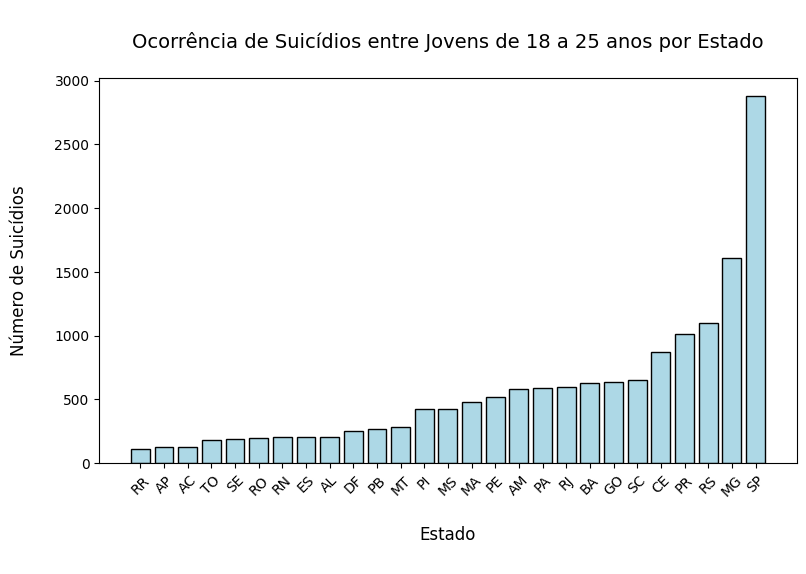

In [80]:
# Filtrar os dados por idade
idade_minima = 18
idade_maxima = 25
dados_filtrados = dados[(dados['IDADE'] >= idade_minima) & (dados['IDADE'] <= idade_maxima)]

# Contar a ocorrência de suicídios por estado
contagem_estados = dados_filtrados['ESTADO'].value_counts()

# Ordenar do menor para o maior número de ocorrências
contagem_estados = contagem_estados.sort_values()

# Criar o gráfico de barras
plt.figure(figsize=(9, 5))
plt.bar(contagem_estados.index, contagem_estados.values, color='lightblue', edgecolor='black')
plt.title('\nOcorrência de Suicídios entre Jovens de 18 a 25 anos por Estado\n', fontsize=14)
plt.xlabel('\nEstado\n', fontsize=12)
plt.ylabel('Número de Suicídios\n', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Referências bibliográficas:
São Paulo, estado mais populoso, DISPONÍVEL EM População brasileira chega a 213,3 milhões de habitantes, estima IBGE (https://www.gov.br/pt-br/noticias/financas-impostos-e-gestao-publica/2021/08/populacao-brasileira-chega-a-213-3-milhoes-de-habitantes-estima-ibge) Publicado em 27/08/2021 18h37, Atualizado em 31/10/2022 15h06

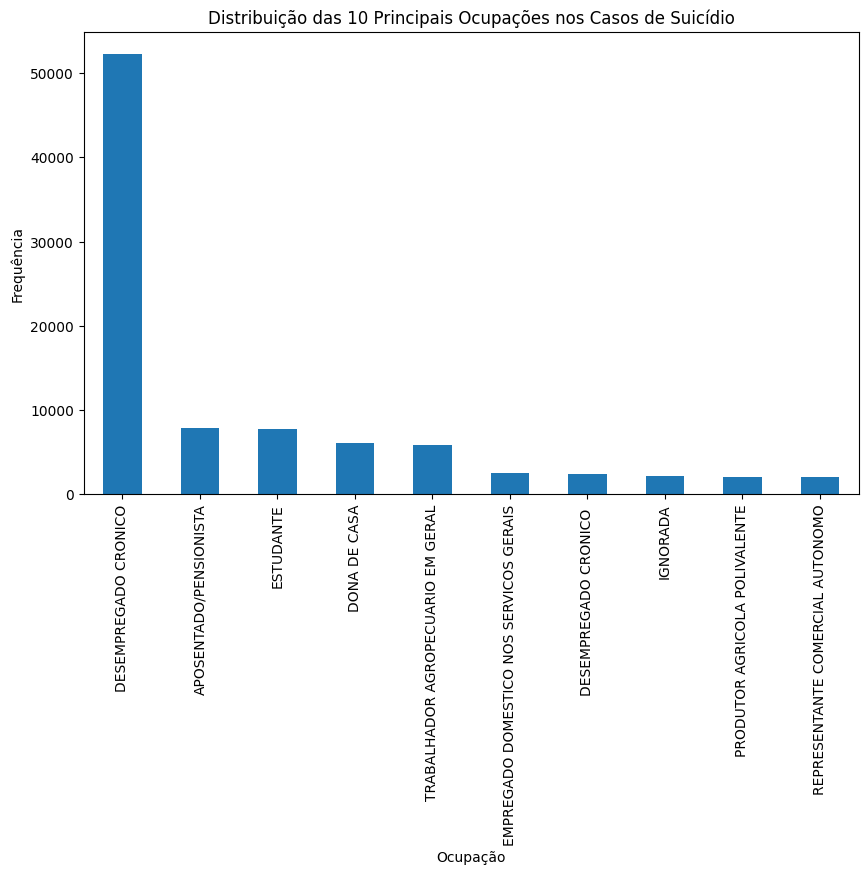

In [81]:
# Filtrar os dados com base na ocupação
filtered_data = dados['OCUP']

# Contar a ocorrência de cada ocupação
occupation_counts = filtered_data.value_counts()

# Selecionar as 10 principais ocupações
top_10_occupations = occupation_counts.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_occupations.plot(kind='bar')
plt.title('Distribuição das 10 Principais Ocupações nos Casos de Suicídio')
plt.xlabel('Ocupação')
plt.ylabel('Frequência')
plt.show()